In [111]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import math
import shutil
import pathlib
import random
from pathlib import Path
from PIL import Image
from translate import translate
import numpy as np
#torch
import torch
from torch import nn
from torch import optim
#torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
#matplotlib
import matplotlib.pyplot as plt

In [96]:
notebook_path = os.getcwd()
print(notebook_path)

/Users/h383kim/pytorch/AlexNet


## Create Directories

In [97]:
# Create a list of all class names in the dataset
original_img_path = '/Users/h383kim/pytorch/AlexNet/raw-img'
class_names = [f for f in os.listdir(original_img_path) if not f.startswith(".")] # To exclude Hidden files ".DS_Store"

# Create a directory for splitted datasets
base_dir = './splitted'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create subdirectories for splitted datasets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
    
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
if not os.path.isdir(val_dir):
    os.mkdir(val_dir)
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

# Create class subdirectories for train/val/test subdirectories
for cls in class_names:
    if not os.path.isdir(os.path.join(train_dir, cls)):
        os.mkdir(os.path.join(train_dir, cls))
    if not os.path.isdir(os.path.join(val_dir, cls)):
        os.mkdir(os.path.join(val_dir, cls))
    if not os.path.isdir(os.path.join(test_dir, cls)):
        os.mkdir(os.path.join(test_dir, cls))

print(len(class_names))

10


## Copy the images into appropriate directories

In [98]:
for cls in class_names:
    img_path = os.path.join(original_img_path, cls) # ./raw-img/cls
    fnames = [f for f in os.listdir(img_path) if not f.startswith(".")] # make a list of all img-files for the class 'cls'

    # Set the size of train/val/test for the class 
    # 8 : 1 : 1
    total = len(fnames)
    train_size = math.floor(total * 0.8)
    val_size = math.floor(total * 0.1)
    test_size = total - train_size - val_size
    
    print(f"Train dataset size of {cls} : {train_size}")
    print(f"Val dataset size of {cls}   : {val_size}")
    print(f"Test dataset size of {cls}  : {test_size}")
    print("")

    ## Copy paste the images from original path to splitted directories
    # Train
    train_fnames = fnames[:train_size]
    for train_img in train_fnames:
        src = os.path.join(img_path, train_img)
        dest = os.path.join(os.path.join(train_dir, cls), train_img)
        shutil.copy(src, dest)

    # Val
    val_fnames = fnames[train_size : (train_size + val_size)]
    for val_img in val_fnames:
        src = os.path.join(img_path, val_img)
        dest = os.path.join(os.path.join(val_dir, cls), val_img)
        shutil.copy(src, dest)

    # Test
    test_fnames = fnames[(train_size + val_size) : total]
    for test_img in test_fnames:
        src = os.path.join(img_path, val_img)
        dest = os.path.join(os.path.join(test_dir, cls), test_img)
        shutil.copy(src, dest)

Train dataset size of gallina : 2478
Val dataset size of gallina   : 309
Test dataset size of gallina  : 311

Train dataset size of ragno : 3856
Val dataset size of ragno   : 482
Test dataset size of ragno  : 483

Train dataset size of gatto : 1334
Val dataset size of gatto   : 166
Test dataset size of gatto  : 168

Train dataset size of farfalla : 1689
Val dataset size of farfalla   : 211
Test dataset size of farfalla  : 212

Train dataset size of mucca : 1492
Val dataset size of mucca   : 186
Test dataset size of mucca  : 188

Train dataset size of cavallo : 2098
Val dataset size of cavallo   : 262
Test dataset size of cavallo  : 263

Train dataset size of cane : 3890
Val dataset size of cane   : 486
Test dataset size of cane  : 487

Train dataset size of pecora : 1456
Val dataset size of pecora   : 182
Test dataset size of pecora  : 182

Train dataset size of scoiattolo : 1489
Val dataset size of scoiattolo   : 186
Test dataset size of scoiattolo  : 187

Train dataset size of elefan

## Visualize Image

24210
/Users/h383kim/pytorch/AlexNet/splitted/train/pecora/OIP-PKqjIzkKoRJyGt_An2XhcgHaFj.jpeg
Height: 225
Width : 300


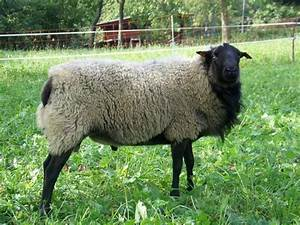

In [99]:
img_path = Path("/Users/h383kim/pytorch/AlexNet/splitted")
img_path_list = list(img_path.glob("*/*/*.jpeg"))

random_img_path = random.choice(img_path_list)
print(len(img_path_list))
print(random_img_path)

image = Image.open(random_img_path)
print(f"Height: {image.height}")
print(f"Width : {image.width}")
image

In [100]:
img_as_array = np.asarray(image)
print(img_as_array.shape)
img_as_array

(225, 300, 3)


array([[[120, 151, 119],
        [ 73, 104,  73],
        [ 45,  75,  47],
        ...,
        [ 19,  33,  36],
        [ 18,  31,  37],
        [ 17,  30,  36]],

       [[ 79, 110,  78],
        [ 51,  82,  51],
        [ 47,  77,  49],
        ...,
        [ 15,  29,  30],
        [ 15,  29,  32],
        [ 15,  29,  32]],

       [[ 42,  73,  42],
        [ 38,  69,  38],
        [ 59,  89,  61],
        ...,
        [ 20,  35,  32],
        [ 20,  34,  34],
        [ 20,  34,  34]],

       ...,

       [[ 25,  72,  28],
        [ 39,  86,  42],
        [ 34,  79,  38],
        ...,
        [140, 191, 116],
        [118, 165,  93],
        [101, 148,  78]],

       [[ 98, 143, 104],
        [ 74, 119,  80],
        [ 38,  83,  44],
        ...,
        [153, 204, 129],
        [136, 186, 115],
        [124, 174, 103]],

       [[115, 154, 125],
        [115, 154, 125],
        [127, 168, 136],
        ...,
        [152, 202, 129],
        [141, 191, 122],
        [119, 170, 101]]

## Creating ImageFolder and DataLoader

In [101]:
# Device-agnostic
DEVICE = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"The model will run on : {DEVICE}")

The model will run on : mps


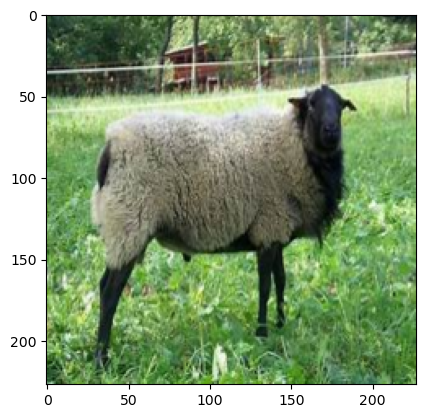

In [102]:
## Transformation
image_transform = transforms.Compose([
    transforms.Resize(size=(227,227)),
    #transforms.CenterCrop(size=(227, 227)),
    transforms.ToTensor()
])

img = image_transform(image)
img.shape
plt.imshow(img.permute(1, 2, 0))

In [103]:
train_dataset = ImageFolder(root=train_dir,
                            transform=image_transform)
val_dataset = ImageFolder(root=val_dir,
                          transform=image_transform)
test_dataset = ImageFolder(root=test_dir,
                           transform=image_transform)

BATCH_SIZE = 128

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=os.cpu_count())
val_dataloader = DataLoader(dataset=val_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=True,
                            num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=os.cpu_count())

## Model

In [136]:
class AlexNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=(11, 11), stride=4),
            nn.ReLU(),
            #nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=(5, 5), stride=1, padding=2),
            nn.ReLU(),
            #nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=(3, 3), padding=1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=(3, 3), padding=1),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.flatten = nn.Flatten()

        self.FC1 = nn.Sequential(
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU()
        )
        self.FC2 = nn.Sequential(
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU()
        )
        self.FC3 = nn.Linear(in_features=4096, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flatten(x)
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)

        return x

In [137]:
AlexModel = AlexNet(in_channels=3, num_classes=10).to(DEVICE)

# Loss Function
loss_fn = nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.SGD(params=AlexModel.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=70, gamma=0.1)

## Train function

In [138]:
def train(model: torch.nn.Module,
          dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module=nn.CrossEntropyLoss()):
    # Put the model into train mode
    model.train()
    train_loss, correct, train_acc = 0, 0, 0

    for batch, (X, y) in enumerate(dataloader):
        # Send X, y into the device
        X, y = X.to(DEVICE), y.to(DEVICE)

        # forward pass
        pred_probs = model(X)

        # Calculate the loss
        loss = loss_fn(pred_probs, y)
        train_loss += loss.item()

        # Optimizer zero_grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        #optimizer step
        optimizer.step()

        pred = torch.argmax(pred_probs, dim=1)
        correct += pred.eq(y.view_as(pred)).sum().item()

    train_loss /= len(dataloader) # (Sum of train_loss for each batch) / (# of batches)
    train_acc = 100. * correct / len(dataloader.dataset)
    return train_loss, train_acc

## Evaluation function

In [139]:
def evaluate(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             optimizer: torch.optim.Optimizer, 
             loss_fn: torch.nn.Module=nn.CrossEntropyLoss()):
    # Put the model into evaluation mode
    model.eval()
    test_loss, correct, test_acc = 0, 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            
            # Forward pass
            pred_probs = model(X)
            
            # Accumulate the loss
            test_loss += loss_fn(pred_probs, y).item()
            
            pred = torch.argmax(pred_probs, dim=1)
            correct += pred.eq(y.view_as(pred)).sum().item()
    
    test_loss /= len(dataloader)
    test_acc = 100. * correct / len(dataloader.dataset)
    return test_loss, test_acc

## Train the model

In [140]:
import time
import copy

def train_baseline(model: torch.nn.Module, 
                   train_dataloader: torch.utils.data.DataLoader, 
                   val_dataloader: torch.utils.data.DataLoader,
                   optimizer: torch.optim.Optimizer,
                   loss_fn: torch.nn.Module=nn.CrossEntropyLoss(),
                   num_epochs: int=30):
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    
    for epoch in range(1, num_epochs + 1):
        start_time = time.time()
        # Train the model and print save the results
        train_loss, train_acc = train(model=model,
                                      dataloader=train_dataloader, 
                                      optimizer=optimizer,
                                      loss_fn=loss_fn)
        
        val_loss, val_acc = evaluate(model=model,
                                     dataloader=val_dataloader,
                                     optimizer=optimizer,
                                     loss_fn=loss_fn)
        
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            
        end_time = time.time()
        time_elapsed = end_time - start_time
        print(f"------------ epoch {epoch} ------------")
        print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")
        print(f"Val loss: {val_loss:.4f} | Val acc: {val_acc:2f}%")
        print(f"Time taken: {time_elapsed / 60:.0f}min {time_elapsed % 60:.0f}s")
        
    model.load_state_dict(best_model_wts)
    return model  

In [141]:
base = train_baseline(model=AlexModel,
                      train_dataloader=train_dataloader,
                      val_dataloader=val_dataloader,
                      optimizer=optimizer,
                      loss_fn=nn.CrossEntropyLoss(),
                      num_epochs=30)

------------ epoch 1 ------------
Train loss: 2.2236 | Train acc: 18.59%
Val loss: 2.2080 | Val acc: 18.592196%
Time taken: 3min 2s
------------ epoch 2 ------------
Train loss: 2.2027 | Train acc: 19.28%
Val loss: 2.1966 | Val acc: 18.439174%
Time taken: 3min 1s
------------ epoch 3 ------------
Train loss: 2.1435 | Train acc: 23.26%
Val loss: 2.0895 | Val acc: 24.751339%
Time taken: 3min 1s
------------ epoch 4 ------------
Train loss: 2.0310 | Train acc: 27.59%
Val loss: 1.9430 | Val acc: 30.221882%
Time taken: 3min 1s
------------ epoch 5 ------------
Train loss: 1.8986 | Train acc: 31.80%
Val loss: 1.8265 | Val acc: 34.506503%
Time taken: 3min 60s
------------ epoch 6 ------------
Train loss: 1.8135 | Train acc: 35.48%
Val loss: 1.6941 | Val acc: 39.671002%
Time taken: 3min 0s
------------ epoch 7 ------------
Train loss: 1.6773 | Train acc: 41.04%
Val loss: 1.6579 | Val acc: 41.966335%
Time taken: 3min 1s
------------ epoch 8 ------------
Train loss: 1.5449 | Train acc: 46.58%
Va

In [142]:
torch.save(base, 'baseline.pt')